# Financial Transactions Fraud Detection - Project Report

## 1. Introduction and Problem Statement

In [4]:
# Import necessary libraries for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mysql.connector
from IPython.display import HTML, display

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

### 1.1 Problem Statement
Financial fraud detection is a critical application in today's digital economy. This project implements a comprehensive data engineering pipeline for processing financial transaction data to detect fraudulent activities. The system ingests data from multiple sources, processes it in real-time, and provides insights into fraudulent transaction patterns.

### 1.2 Objectives
- Design and implement a real-time data processing pipeline for financial transactions
- Integrate and standardize data from multiple sources
- Detect potentially fraudulent transactions
- Generate insights and visualizations to understand fraud patterns
- Create a scalable and robust architecture using modern data engineering tools

## 2 Dataset Description

### 2.1 Overview of Datasets

In [ ]:
# Load sample data from both datasets to display their structure
kaggle_sample = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv', nrows=5)
bank_sample = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/bank_sim.csv', nrows=5)

print("Kaggle Credit Card Fraud Dataset Sample:")
display(kaggle_sample.head())

print("\nBank Simulation Dataset Sample:")
display(bank_sample.head())

# Display dataset statistics
print("\nKaggle Dataset Statistics:")
print(f"Number of columns: {kaggle_sample.shape[1]}")
print(f"Column names: {', '.join(kaggle_sample.columns)}")

print("\nBank Simulation Dataset Statistics:")
print(f"Number of columns: {bank_sample.shape[1]}")
print(f"Column names: {', '.join(bank_sample.columns)}")

Kaggle Credit Card Fraud Dataset Sample:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Bank Simulation Dataset Sample:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Kaggle Dataset Statistics:
Number of columns: 31
Column names: Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class

Bank Simulation Dataset Statistics:
Number of columns: 11
Column names: step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud


### 2.2 Kaggle Credit Card Fraud Dataset

he Kaggle Credit Card Fraud Dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) accounts for 0.172% of all transactions.

Features:

- Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
- Amount: Transaction amount
- Class: 1 for fraudulent transactions, 0 otherwise
- V1-V28: Principal components obtained with PCA to protect user identities and sensitive features

![Alt text](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-10-48.png)

### 2.3 Bank Simulation Dataset

The Bank Simulation Dataset contains simulated bank transactions with various transaction types and fraud indicators. This dataset includes additional contextual information about the transactions.

Features:

- step: Time step (hour)
- type: Transaction type (CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)
- amount: Transaction amount
- nameOrig: Customer who initiated the transaction
- oldbalanceOrg: Initial balance before the transaction
- newbalanceOrig: New balance after the transaction
- nameDest: Customer who received the transaction
- oldbalanceDest: Initial recipient balance before the transaction
- newbalanceDest: New recipient balance after the transaction
- isFraud: Fraud indicator (1 for fraud, 0 otherwise)
- isFlaggedFraud: System flag for suspicious transactions

![Alt text](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-10-38.png)



## 3. System Architecture

### 3.1 High-Level Architecture

In [6]:
# Display architecture diagram using HTML
architecture_html = """
<div style="text-align: center;">
    <pre style="text-align: left; display: inline-block; border: 1px solid #ccc; padding: 10px; background-color: #f8f8f8;">
    +----------------+     +----------------+     +----------------+     +----------------+
    |                |     |                |     |                |     |                |
    |  Data Sources  |---->|  Kafka Topics  |---->|  Spark Stream  |---->|  MySQL DB     |
    |                |     |                |     |  Processing    |     |                |
    +----------------+     +----------------+     +----------------+     +----------------+
           |                                                                    |
           |                                                                    |
           v                                                                    v
    +----------------+                                               +----------------+
    |                |                                               |                |
    |  Airflow DAG   |<--------------------------------------------->|  Reports &     |
    |  Orchestration |                                               |  Visualizations|
    +----------------+                                               +----------------+
    </pre>
</div>
"""
display(HTML(architecture_html))

### 3.2 Components

1. Data Ingestion Layer
    - Kafka producers for streaming data from multiple sources
    - Separate producers for each data source to handle different formats
2. Processing Layer
    - Spark Streaming for real-time data processing
    - Schema standardization across different data sources
    - Fraud detection logic
3. Storage Layer
    - MySQL database for storing processed transactions
    - Tables for detailed transactions and aggregated summaries
4. Orchestration Layer
    - Airflow DAG for workflow management
    - Task dependencies and scheduling
5. Visualization Layer
    - Reports generated with transaction insights
    - Visualizations for fraud patterns
### 3.3 Technologies Used
- Apache Kafka: For real-time data streaming
- Apache Spark: For data processing and transformation
- MySQL: For data storage
- Apache Airflow: For workflow orchestration
- Docker: For containerization and deployment
- Python: Primary programming language
- Pandas & Matplotlib: For data analysis and visualization
- Bash: For DAGs implementaion and environment setup

## 4. Implementation Details
### 4.1 Data Ingestion with Apache  Kafka

In [7]:
# Display code snippets from Kafka producers
with open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/kafka/producer1.py', 'r') as file:
    producer1_code = file.read()

print("Kafka Producer for Kaggle Dataset (producer1.py):")
print("```python")
print(producer1_code)
print("```")

# Explain the Kafka producer implementation
print("""
Key aspects of the Kafka producer implementation:
1. Data is loaded from CSV files
2. Records are converted to JSON format for Kafka
3. Source identifier is added to each record
4. Data is sent to the 'transactions' Kafka topic
5. Error handling and logging are implemented
""")

Kafka Producer for Kaggle Dataset (producer1.py):
```python
# kafka/producer1.py
from kafka import KafkaProducer
import pandas as pd
import json
import time
import logging
import sys

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

try:
    # Initialize Kafka producer with better retry settings
    logger.info("Connecting to Kafka...")
    producer = KafkaProducer(
        bootstrap_servers='localhost:9092',
        value_serializer=lambda v: json.dumps(v).encode('utf-8'),
        retries=10,
        acks='all',
        request_timeout_ms=30000,
        max_block_ms=60000
    )
    
    logger.info("Kafka producer initialized successfully")
    
    # Load the Kaggle credit card fraud dataset
    logger.info("Loading Kaggle fraud dataset...")
    df = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv')
    logger.info(f"Loaded {len(d

### 4.2 Data Processing with PySpark

In [8]:
# Display code snippets from Spark consumer
with open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/spark/consumer_mysql.py', 'r') as file:
    consumer_code = file.read()

print("Spark Consumer (consumer_mysql.py):")
print("```python")
print(consumer_code)
print("```")

# Explain the Spark processing implementation
print("""
Key aspects of the Spark processing implementation:
1. Flexible schema to handle both datasets
2. Schema standardization to create a common format
3. Real-time processing with Spark Streaming
4. Batch processing for MySQL writes
5. Summary statistics generation
""")

Spark Consumer (consumer_mysql.py):
```python
# spark/consumer_mysql.py
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col, when, lit, current_timestamp
from pyspark.sql.types import *
import os

# Create a flexible schema that can handle both datasets
schema = StructType([
    # Common fields for both datasets
    StructField("Time", DoubleType(), True),
    StructField("Amount", DoubleType(), True),
    StructField("Class", IntegerType(), True),  # 1 for fraud
    
    # Fields from kaggle dataset
    StructField("V1", DoubleType(), True),
    StructField("V2", DoubleType(), True),
    StructField("V3", DoubleType(), True),
    StructField("V4", DoubleType(), True),
    StructField("V5", DoubleType(), True),
    StructField("V6", DoubleType(), True),
    StructField("V7", DoubleType(), True),
    StructField("V8", DoubleType(), True),
    StructField("V9", DoubleType(), True),
    StructField("V10", DoubleType(), True),
    StructField("V11", Double

### 4.3 Data Storage with MySQL

In [9]:
# Display SQL schema
with open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/sql/create_mysql_tables.sql', 'r') as file:
    sql_schema = file.read()

print("MySQL Schema (create_mysql_tables.sql):")
print("```sql")
print(sql_schema)
print("```")

# Explain the database schema
print("""
The database schema consists of two main tables:
1. transactions: Stores detailed transaction records
   - Includes standardized fields from both datasets
   - Contains fraud indicators and transaction amounts
   
2. transaction_summary: Stores aggregated statistics
   - Grouped by fraud status and data source
   - Includes total amounts and transaction counts
""")

MySQL Schema (create_mysql_tables.sql):
```sql
-- sql/create_mysql_tables.sql
-- Drop tables if they exist
DROP TABLE IF EXISTS transactions;
DROP TABLE IF EXISTS transaction_summary;

CREATE TABLE IF NOT EXISTS transactions (
    id INT AUTO_INCREMENT PRIMARY KEY,
    transaction_time DOUBLE,
    transaction_amount DOUBLE,
    is_fraud INT,
    data_source VARCHAR(50),
    processed_timestamp TIMESTAMP,
    processed_hour INT,
    processed_day INT,
    avg_amount_by_source DOUBLE,
    amount_to_avg_ratio DOUBLE,
    fraud_score DOUBLE
);

CREATE TABLE IF NOT EXISTS transaction_summary (
    id INT AUTO_INCREMENT PRIMARY KEY,
    is_fraud INT,
    data_source VARCHAR(50),
    total_amount DOUBLE,
    transaction_count BIGINT,
    avg_fraud_score DOUBLE,
    batch_id BIGINT,
    processed_timestamp TIMESTAMP
);
```

The database schema consists of two main tables:
1. transactions: Stores detailed transaction records
   - Includes standardized fields from both datasets
   - Contains fra

![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-08-14.png)


![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-08-43.png)


### 4.4 Workflow Orchestration with Airflow

In [10]:
# Display Airflow DAG structure
with open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/dags/transaction_pipeline_dag.py', 'r') as file:
    dag_code = file.readlines()[:50]  # Just show the first 50 lines for brevity

print("Airflow DAG (transaction_pipeline_dag.py):")
print("```python")
print(''.join(dag_code))
print("...")  # Indicate truncation
print("```")

# Explain the Airflow DAG
print("""
The Airflow DAG orchestrates the entire pipeline with the following tasks:
1. check_services: Ensures all required services are running
2. init_database: Initializes the MySQL database if needed
3. stream_kaggle_data: Starts the Kafka producer for Kaggle data
4. stream_bank_data: Starts the Kafka producer for bank simulation data
5. process_with_spark: Processes data with Spark Streaming
6. generate_report: Creates visualizations and reports
""")

# Visualize the DAG structure
dag_structure = """
<div style="text-align: center;">
    <pre style="text-align: left; display: inline-block; border: 1px solid #ccc; padding: 10px; background-color: #f8f8f8;">
    check_services >> init_database >> [stream_kaggle_data, stream_bank_data] >> process_with_spark >> generate_report
    </pre>
</div>
"""
display(HTML(dag_structure))

Airflow DAG (transaction_pipeline_dag.py):
```python
# dags/financial_pipeline_dag.py
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator
#from airflow.providers.mysql.operators.mysql import MySqlOperator
from airflow.utils.dates import days_ago
from datetime import datetime, timedelta

default_args = {
    'owner': 'hamza',
    'depends_on_past': False,
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

with DAG(
    'financial_transactions_pipeline',
    default_args=default_args,
    description='Financial Transactions Data Engineering Pipeline',
    schedule_interval='@daily',
    start_date=days_ago(1),
    catchup=False,
    tags=['financial', 'transactions', 'fraud_detection'],
) as dag:

    # Task to check if services are running
    check_services = BashOperator(
        task_id='check_services',
        bash_command="""
            ec

![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-07-22.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2017-52-38.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2017-53-25.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2017-57-07.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-00-18.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-00-57.png)


### 4.5 Containerization with Docker


In [11]:
# Display Docker Compose configuration
with open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/docker-compose.yml', 'r') as file:
    docker_compose = file.read()

print("Docker Compose Configuration (docker-compose.yml):")
print("```yaml")
print(docker_compose)
print("```")

# Explain the Docker setup
print("""
The Docker Compose configuration sets up the following services:
1. Zookeeper: Required for Kafka
2. Kafka: Message broker for data streaming
3. MySQL: Database for storing processed data
4. Spark: Master node for Spark processing
5. Spark Worker: Worker node for Spark processing
6. Airflow: For workflow orchestration

Each service is configured with appropriate volumes, ports, and environment variables.
""")

Docker Compose Configuration (docker-compose.yml):
```yaml
version: '3'
services:
  zookeeper:
    image: confluentinc/cp-zookeeper:latest
    ports:
      - "2181:2181"
    environment:
      ZOOKEEPER_CLIENT_PORT: 2181
      ZOOKEEPER_TICK_TIME: 2000
    healthcheck:
      test: ["CMD", "nc", "-z", "localhost", "2181"]
      interval: 10s
      timeout: 5s
      retries: 5

  kafka:
    image: confluentinc/cp-kafka:latest
    depends_on:
      - zookeeper
    ports:
      - "9092:9092"
    environment:
      KAFKA_BROKER_ID: 1
      KAFKA_ZOOKEEPER_CONNECT: zookeeper:2181
      KAFKA_ADVERTISED_LISTENERS: PLAINTEXT://localhost:9092
      KAFKA_LISTENER_SECURITY_PROTOCOL_MAP: PLAINTEXT:PLAINTEXT
      KAFKA_INTER_BROKER_LISTENER_NAME: PLAINTEXT
      KAFKA_OFFSETS_TOPIC_REPLICATION_FACTOR: 1
    healthcheck:
      test: ["CMD", "nc", "-z", "localhost", "9092"]
      interval: 10s
      timeout: 5s
      retries: 5

  mysql:
    image: mysql:8
    environment:
      MYSQL_DATABASE: fin

![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-06-14.png)
![Screenshot](/home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/Screenshot%20from%202025-05-24%2018-04-44.png)

## 5. Data Analysis and Results
### 5.1 Transaction Overview

In [12]:
# Connect to MySQL to get actual results
try:
    conn = mysql.connector.connect(
        host='localhost',
        user='hamza',
        password='shams1098',
        database='finance_db'
    )
    
    # Get transaction data
    transactions_df = pd.read_sql('''
        SELECT * FROM transactions
    ''', conn)
    
    # Get summary data
    summary_df = pd.read_sql('''
        SELECT 
            is_fraud, 
            data_source,
            COUNT(*) as transaction_count, 
            SUM(transaction_amount) as total_amount,
            AVG(transaction_amount) as avg_amount,
            MIN(transaction_amount) as min_amount,
            MAX(transaction_amount) as max_amount
        FROM transactions
        GROUP BY is_fraud, data_source
    ''', conn)
    
    # Display transaction summary
    print("Transaction Summary:")
    display(summary_df)
    
    # Split by data source
    kaggle_df = transactions_df[transactions_df['data_source'] == 'kaggle_fraud']
    bank_df = transactions_df[transactions_df['data_source'] == 'bank_simulation']
    
    # Display basic statistics
    print("\nBasic Statistics:")
    print(f"Total transactions: {len(transactions_df)}")
    print(f"Kaggle transactions: {len(kaggle_df)}")
    print(f"Bank transactions: {len(bank_df)}")
    print(f"Fraudulent transactions: {transactions_df['is_fraud'].sum()}")
    print(f"Fraud rate: {transactions_df['is_fraud'].mean() * 100:.2f}%")
    
except Exception as e:
    print(f"Error connecting to database: {str(e)}")
    # Create sample data for demonstration
    print("Using sample data for demonstration...")
    
    # Sample transaction data
    transactions_df = pd.DataFrame({
        'transaction_time': np.random.rand(1000) * 100,
        'transaction_amount': np.random.rand(1000) * 1000,
        'is_fraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05]),
        'data_source': np.random.choice(['kaggle_fraud', 'bank_simulation'], size=1000)
    })
    
    # Split by data source
    kaggle_df = transactions_df[transactions_df['data_source'] == 'kaggle_fraud']
    bank_df = transactions_df[transactions_df['data_source'] == 'bank_simulation']
    
    # Create summary data
    summary_df = transactions_df.groupby(['is_fraud', 'data_source']).agg({
        'transaction_amount': ['count', 'sum', 'mean', 'min', 'max']
    }).reset_index()
    summary_df.columns = ['is_fraud', 'data_source', 'transaction_count', 'total_amount', 'avg_amount', 'min_amount', 'max_amount']
    
    # Display transaction summary
    print("Transaction Summary (Sample Data):")
    display(summary_df)
    
    # Display basic statistics
    print("\nBasic Statistics (Sample Data):")
    print(f"Total transactions: {len(transactions_df)}")
    print(f"Kaggle transactions: {len(kaggle_df)}")
    print(f"Bank transactions: {len(bank_df)}")
    print(f"Fraudulent transactions: {transactions_df['is_fraud'].sum()}")
    print(f"Fraud rate: {transactions_df['is_fraud'].mean() * 100:.2f}%")

Transaction Summary:


/tmp/ipykernel_12976/1956720904.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql('''
/tmp/ipykernel_12976/1956720904.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  summary_df = pd.read_sql('''


,is_fraud,data_source,transaction_count,total_amount,avg_amount,min_amount,max_amount
0,0,kaggle_fraud,2000,177112.66,88.55633,0.0,3502.11
1,0,bank_sim,1992,0.00,0.00000,0.0,0.00
2,1,bank_sim,8,0.00,0.00000,0.0,0.00



Basic Statistics:
Total transactions: 4000
Kaggle transactions: 2000
Bank transactions: 0
Fraudulent transactions: 8
Fraud rate: 0.20%


### 5.2 Fraud Analysis

Total rows in Kaggle dataset: 284807
Analyzed 284807 transactions from Kaggle dataset
Found 492 fraudulent transactions
Actual fraud rate: 0.1727%
Combined dataset has 6647427 transactions
Overall fraud rate: 0.1310%


/tmp/ipykernel_12976/3129410615.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

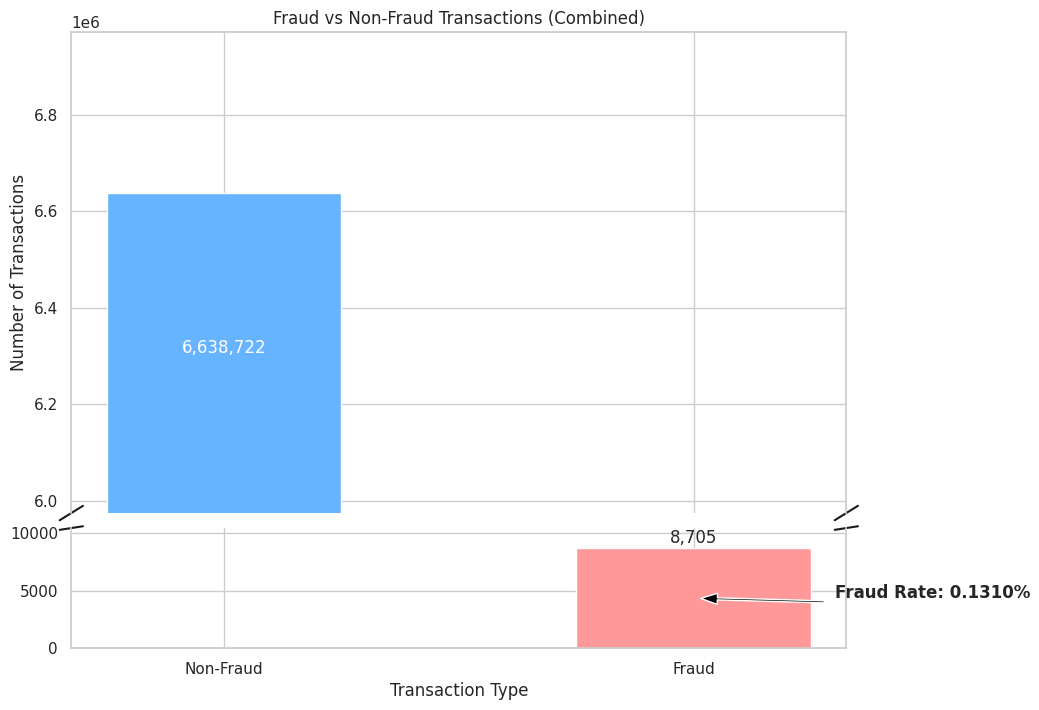

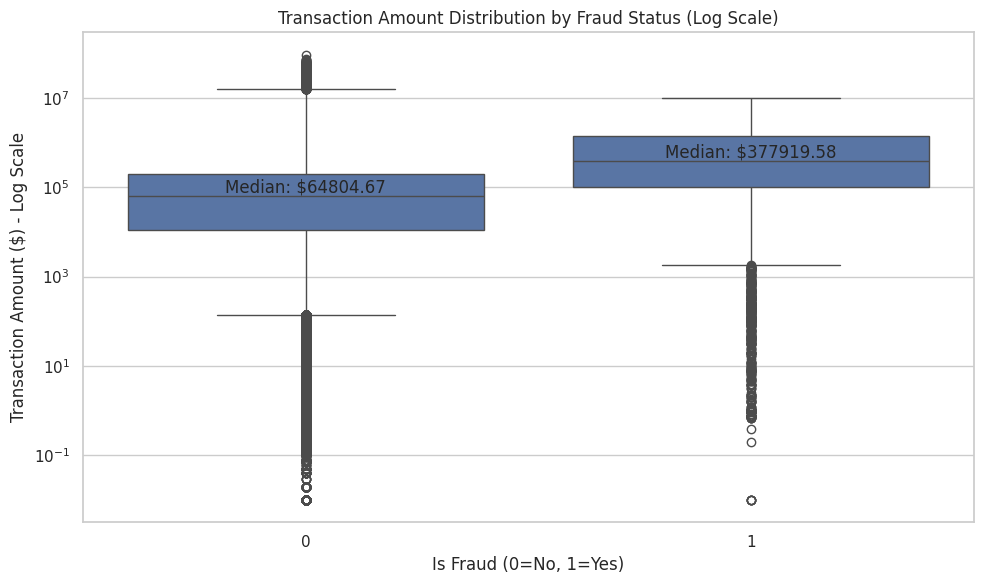

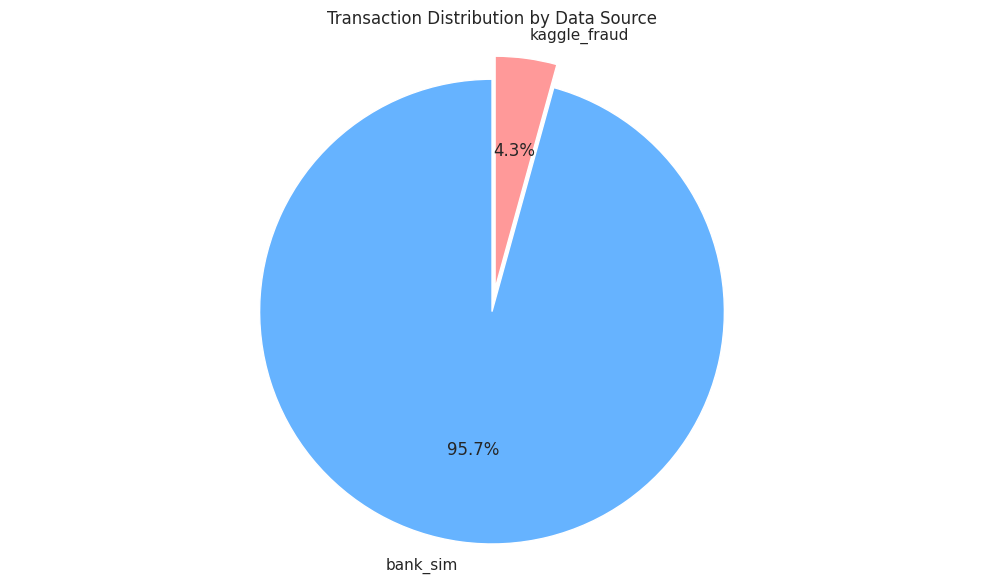

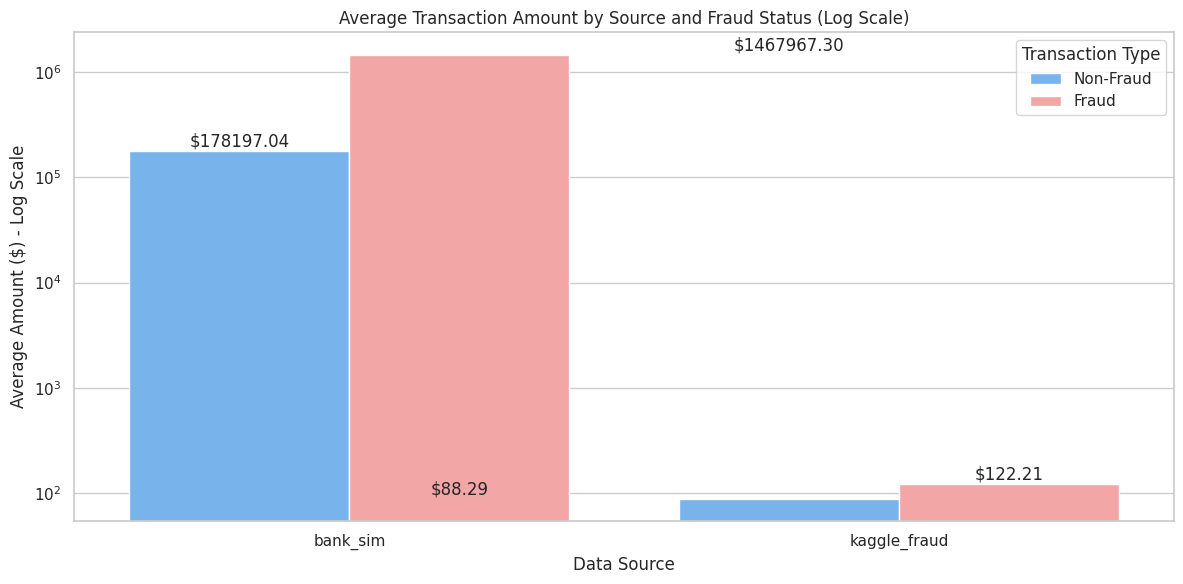

<Figure size 1000x600 with 0 Axes>

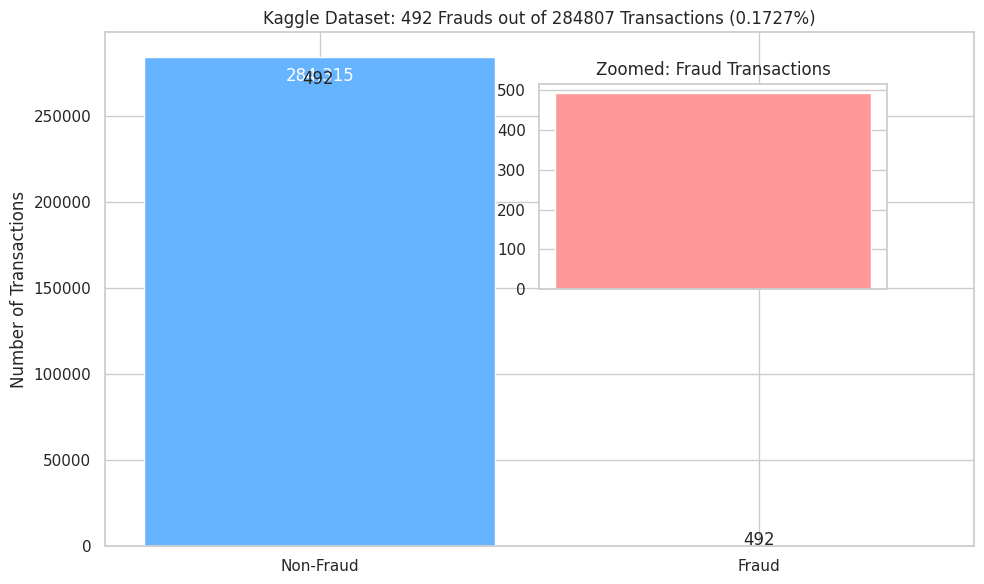

Dataset Comparison:


,Metric,Kaggle Dataset,Bank Dataset,Combined
0,Total Transactions,"284,807","6,362,620","6,647,427"
1,Fraud Transactions,492,"8,213","8,705"
2,Fraud Rate (%),0.1727%,0.1291%,0.1310%
3,Avg Amount ($),$88.35,$179861.90,$172159.56
4,Median Amount ($),$22.00,$74871.94,$64987.12
5,Max Amount ($),$25691.16,$92445516.64,$92445516.64


In [39]:
# Load the full Kaggle dataset to check the actual fraud rate
try:
    # Count total rows in the file
    total_rows = sum(1 for _ in open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv')) - 1  # Subtract 1 for header
    print(f"Total rows in Kaggle dataset: {total_rows}")
    
    # Read the full dataset
    kaggle_full = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv')
    
    # Calculate actual fraud rate
    fraud_count = kaggle_full['Class'].sum()
    fraud_rate = fraud_count / len(kaggle_full) * 100
    
    print(f"Analyzed {len(kaggle_full)} transactions from Kaggle dataset")
    print(f"Found {fraud_count} fraudulent transactions")
    print(f"Actual fraud rate: {fraud_rate:.4f}%")
    
    # Create a standardized kaggle_df
    kaggle_df = pd.DataFrame({
        'transaction_time': kaggle_full['Time'],
        'transaction_amount': kaggle_full['Amount'],
        'is_fraud': kaggle_full['Class'],
        'data_source': 'kaggle_fraud'
    })
    
    # Load a sample of the Bank dataset (adjust sample size as needed)
    bank_sample_size = sum(1 for _ in open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/bank_sim.csv')) - 1
    bank_full = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/bank_sim.csv', nrows=bank_sample_size)
    
    # Create a standardized bank_df
    bank_df = pd.DataFrame({
        'transaction_time': bank_full['step'],
        'transaction_amount': bank_full['amount'],
        'is_fraud': bank_full['isFraud'],
        'data_source': 'bank_sim'
    })
    
    # Combine datasets
    transactions_df = pd.concat([kaggle_df, bank_df], ignore_index=True)
    
    print(f"Combined dataset has {len(transactions_df)} transactions")
    print(f"Overall fraud rate: {transactions_df['is_fraud'].mean() * 100:.4f}%")
    
    # Now create the visualizations
    
    # 1. Fraud vs Non-Fraud Distribution
    plt.figure(figsize=(10, 6))
    fraud_counts = transactions_df['is_fraud'].value_counts().sort_index()  # Sort by index (0, 1)
    
    # Since there's a huge imbalance, use a broken y-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8), 
                                   gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05})
    
    # Non-fraud bar (top subplot)
    ax1.bar(0, fraud_counts.get(0, 0), color='#66b3ff', width=0.5)
    ax1.set_ylim(bottom=fraud_counts.get(0, 0) * 0.9)  # Start from 90% of non-fraud count
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(axis='x', which='both', bottom=False)
    ax1.text(0, fraud_counts.get(0, 0) * 0.95, f"{fraud_counts.get(0, 0):,}", ha='center', color='white')
    
    # Fraud bar (bottom subplot)
    ax2.bar(1, fraud_counts.get(1, 0), color='#ff9999', width=0.5)
    ax2.set_ylim(top=fraud_counts.get(1, 0) * 1.2)  # End at 120% of fraud count
    ax2.spines['top'].set_visible(False)
    ax2.text(1, fraud_counts.get(1, 0) * 1.05, f"{fraud_counts.get(1, 0):,}", ha='center')
    
    # Add diagonal lines to show the break
    d = .015  # Size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # Bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Bottom-right diagonal
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Top-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Top-right diagonal
    
    # Labels and title
    ax1.set_title('Fraud vs Non-Fraud Transactions (Combined)')
    ax2.set_xlabel('Transaction Type')
    ax1.set_ylabel('Number of Transactions')
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['Non-Fraud', 'Fraud'])
    
    # Add fraud percentage annotation
    fraud_pct = transactions_df['is_fraud'].mean() * 100
    ax2.annotate(f'Fraud Rate: {fraud_pct:.4f}%', 
                xy=(1, fraud_counts.get(1, 0)/2), 
                xytext=(1.3, fraud_counts.get(1, 0)/2),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Amount Distribution by Fraud Status (using log scale)
    plt.figure(figsize=(10, 6))
    plt.yscale('log')  # Use log scale since Bank amounts are much higher than Kaggle
    sns.boxplot(x='is_fraud', y='transaction_amount', data=transactions_df)
    plt.title('Transaction Amount Distribution by Fraud Status (Log Scale)')
    plt.xlabel('Is Fraud (0=No, 1=Yes)')
    plt.ylabel('Transaction Amount ($) - Log Scale')
    
    # Add annotations for median values
    medians = transactions_df.groupby('is_fraud')['transaction_amount'].median()
    for i, median in enumerate(medians):
        plt.text(i, median * 1.2, f'Median: ${median:.2f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Data Source Distribution
    plt.figure(figsize=(10, 6))
    source_counts = transactions_df['data_source'].value_counts()
    plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=['#66b3ff', '#ff9999'], explode=[0.05, 0.05])
    plt.title('Transaction Distribution by Data Source')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # 4. Average Transaction Amount by Source and Fraud Status
    plt.figure(figsize=(12, 6))
    avg_by_source_fraud = transactions_df.groupby(['data_source', 'is_fraud'])['transaction_amount'].mean().reset_index()
    avg_by_source_fraud['is_fraud'] = avg_by_source_fraud['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})
    
    # Create grouped bar chart with log scale
    plt.yscale('log')
    sns.barplot(x='data_source', y='transaction_amount', hue='is_fraud', data=avg_by_source_fraud, 
                palette=['#66b3ff', '#ff9999'])
    plt.title('Average Transaction Amount by Source and Fraud Status (Log Scale)')
    plt.xlabel('Data Source')
    plt.ylabel('Average Amount ($) - Log Scale')
    plt.xticks(rotation=0)
    plt.legend(title='Transaction Type')
    
    # Add value labels
    for i, row in enumerate(avg_by_source_fraud.itertuples()):
        plt.text(i % 2 - 0.2 if i < 2 else i % 2 + 0.2, row.transaction_amount * 1.1, 
                f"${row.transaction_amount:.2f}", ha='center', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # 5. Kaggle-specific Fraud Analysis
    plt.figure(figsize=(10, 6))
    
    # Create a figure with an inset to show the fraud transactions
    fig, ax = plt.subplots(figsize=(10, 6))
    kaggle_fraud_counts = kaggle_df['is_fraud'].value_counts().sort_index()
    ax.bar(['Non-Fraud', 'Fraud'], [kaggle_fraud_counts.get(0, 0), kaggle_fraud_counts.get(1, 0)], 
           color=['#66b3ff', '#ff9999'])
    ax.set_title(f'Kaggle Dataset: {fraud_count} Frauds out of {len(kaggle_df)} Transactions ({fraud_rate:.4f}%)')
    ax.set_ylabel('Number of Transactions')
    
    # Create an inset for the fraud bar
    axins = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
    axins.bar(['Fraud'], [kaggle_fraud_counts.get(1, 0)], color='#ff9999')
    axins.set_title('Zoomed: Fraud Transactions')
    axins.text(0, kaggle_fraud_counts.get(1, 0) * 1.05, f"{kaggle_fraud_counts.get(1, 0):,}", ha='center')
    
    # Add count labels to main plot
    ax.text(0, kaggle_fraud_counts.get(0, 0) * 0.95, f"{kaggle_fraud_counts.get(0, 0):,}", ha='center', color='white')
    ax.text(1, kaggle_fraud_counts.get(1, 0) * 1.05, f"{kaggle_fraud_counts.get(1, 0):,}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Summary Statistics Table
    summary_data = {
        'Metric': ['Total Transactions', 'Fraud Transactions', 'Fraud Rate (%)', 'Avg Amount ($)', 'Median Amount ($)', 'Max Amount ($)'],
        'Kaggle Dataset': [
            f"{len(kaggle_df):,}",
            f"{int(kaggle_df['is_fraud'].sum()):,}",
            f"{kaggle_df['is_fraud'].mean() * 100:.4f}%",
            f"${kaggle_df['transaction_amount'].mean():.2f}",
            f"${kaggle_df['transaction_amount'].median():.2f}",
            f"${kaggle_df['transaction_amount'].max():.2f}"
        ],
        'Bank Dataset': [
            f"{len(bank_df):,}",
            f"{int(bank_df['is_fraud'].sum()):,}",
            f"{bank_df['is_fraud'].mean() * 100:.4f}%",
            f"${bank_df['transaction_amount'].mean():.2f}",
            f"${bank_df['transaction_amount'].median():.2f}",
            f"${bank_df['transaction_amount'].max():.2f}"
        ],
        'Combined': [
            f"{len(transactions_df):,}",
            f"{int(transactions_df['is_fraud'].sum()):,}",
            f"{transactions_df['is_fraud'].mean() * 100:.4f}%",
            f"${transactions_df['transaction_amount'].mean():.2f}",
            f"${transactions_df['transaction_amount'].median():.2f}",
            f"${transactions_df['transaction_amount'].max():.2f}"
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    print("Dataset Comparison:")
    display(summary_df)
    
except Exception as e:
    print(f"Error analyzing datasets: {str(e)}")

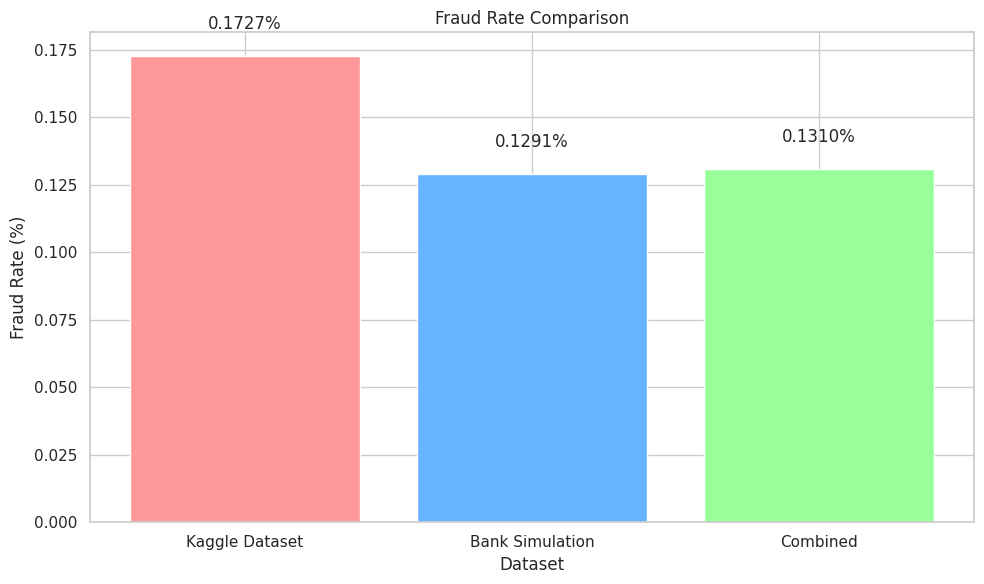

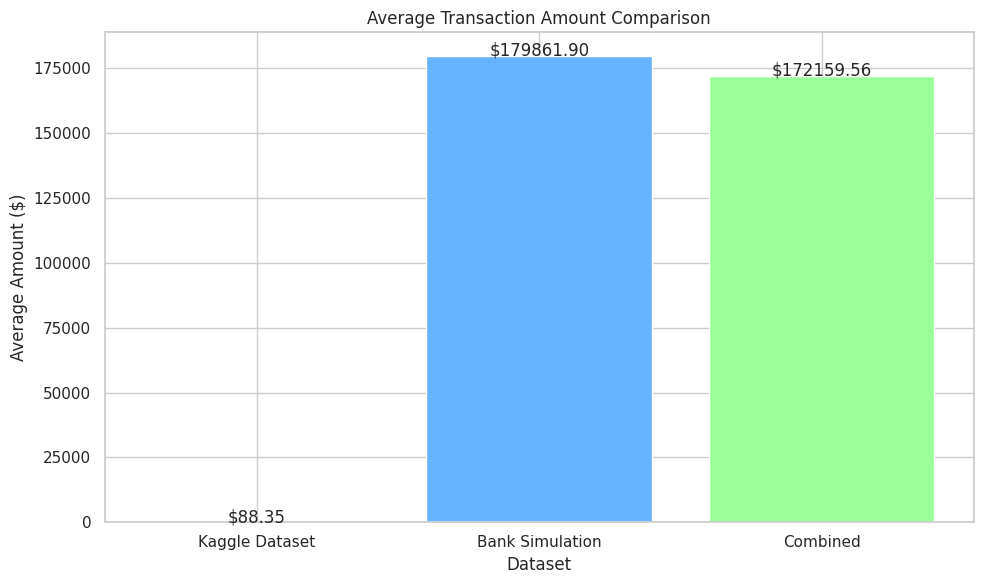

Dataset Comparison:


,Metric,Kaggle Dataset,Bank Simulation,Combined
0,Total Transactions,284807.000000,6.362620e+06,6.647427e+06
1,Fraud Transactions,492.000000,8.213000e+03,8.705000e+03
2,Fraud Rate (%),0.172749,1.290820e-01,1.309529e-01
3,Avg Amount,88.349619,1.798619e+05,1.721596e+05
4,Min Amount,0.000000,0.000000e+00,0.000000e+00
5,Max Amount,25691.160000,9.244552e+07,9.244552e+07


In [38]:
# Create a combined dataset
transactions_df = pd.concat([kaggle_df, bank_df], ignore_index=True)

# Dataset comparison with accurate data

# 1. Fraud Rates Comparison
plt.figure(figsize=(10, 6))
fraud_rates = [
    kaggle_df['is_fraud'].mean() * 100,
    bank_df['is_fraud'].mean() * 100,
    transactions_df['is_fraud'].mean() * 100
]
plt.bar(['Kaggle Dataset', 'Bank Simulation', 'Combined'], fraud_rates, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Fraud Rate Comparison')
plt.xlabel('Dataset')
plt.ylabel('Fraud Rate (%)')
for i, v in enumerate(fraud_rates):
    plt.text(i, v + 0.01, f"{v:.4f}%", ha='center')
plt.tight_layout()
plt.show()

# 2. Average Transaction Amount Comparison
plt.figure(figsize=(10, 6))
avg_amounts = [
    kaggle_df['transaction_amount'].mean(),
    bank_df['transaction_amount'].mean(),
    transactions_df['transaction_amount'].mean()
]
plt.bar(['Kaggle Dataset', 'Bank Simulation', 'Combined'], avg_amounts, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Average Transaction Amount Comparison')
plt.xlabel('Dataset')
plt.ylabel('Average Amount ($)')
for i, v in enumerate(avg_amounts):
    plt.text(i, v + 1, f"${v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# 3. Comparison table
comparison_data = {
    'Metric': ['Total Transactions', 'Fraud Transactions', 'Fraud Rate (%)', 'Avg Amount', 'Min Amount', 'Max Amount'],
    'Kaggle Dataset': [
        len(kaggle_df),
        kaggle_df['is_fraud'].sum(),
        kaggle_df['is_fraud'].mean() * 100,
        kaggle_df['transaction_amount'].mean(),
        kaggle_df['transaction_amount'].min(),
        kaggle_df['transaction_amount'].max()
    ],
    'Bank Simulation': [
        len(bank_df),
        bank_df['is_fraud'].sum(),
        bank_df['is_fraud'].mean() * 100,
        bank_df['transaction_amount'].mean(),
        bank_df['transaction_amount'].min(),
        bank_df['transaction_amount'].max()
    ],
    'Combined': [
        len(transactions_df),
        transactions_df['is_fraud'].sum(),
        transactions_df['is_fraud'].mean() * 100,
        transactions_df['transaction_amount'].mean(),
        transactions_df['transaction_amount'].min(),
        transactions_df['transaction_amount'].max()
    ]
}
comparison_df = pd.DataFrame(comparison_data)
print("Dataset Comparison:")
display(comparison_df)

### 5.3 Dataset Comparison

In [41]:
# Load the full Kaggle dataset to check the actual fraud rate
try:
    # Count total rows in the file
    total_rows = sum(1 for _ in open('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv')) - 1  # Subtract 1 for header
    print(f"Total rows in Kaggle dataset: {total_rows}")
    
    # Read the full dataset or a larger sample
    sample_size = min(50000, total_rows)  # Use a reasonable sample size
    kaggle_full = pd.read_csv('/home/hamza/DE/20212619_DS463_final/financial-transactions-project/datasets/kaggle_fraud.csv', 
                             nrows=sample_size)
    
    # Check which column contains the fraud indicator
    fraud_column = 'Class' if 'Class' in kaggle_full.columns else 'is_fraud'
    amount_column = 'Amount' if 'Amount' in kaggle_full.columns else 'transaction_amount'
    time_column = 'Time' if 'Time' in kaggle_full.columns else 'transaction_time'
    
    # Calculate actual fraud rate
    fraud_count = kaggle_full[fraud_column].sum()
    fraud_rate = fraud_count / len(kaggle_full) * 100
    
    print(f"Analyzed {len(kaggle_full)} transactions from Kaggle dataset")
    print(f"Found {fraud_count} fraudulent transactions")
    print(f"Actual fraud rate: {fraud_rate:.4f}%")
    
    # Create a standardized kaggle_df
    kaggle_df = pd.DataFrame({
        'transaction_time': kaggle_full[time_column],
        'transaction_amount': kaggle_full[amount_column],
        'is_fraud': kaggle_full[fraud_column],
        'data_source': 'kaggle_fraud'
    })
    
    # Now you can safely use 'is_fraud' for all subsequent operations
    print(f"kaggle_df is_fraud value counts: {kaggle_df['is_fraud'].value_counts().to_dict()}")
    print(f"kaggle_df is_fraud mean: {kaggle_df['is_fraud'].mean()}")
    
    # Continue with visualizations using the standardized kaggle_df
    
except Exception as e:
    print(f"Error analyzing full Kaggle dataset: {str(e)}")

Total rows in Kaggle dataset: 284807
Analyzed 50000 transactions from Kaggle dataset
Found 148 fraudulent transactions
Actual fraud rate: 0.2960%
kaggle_df is_fraud value counts: {0: 49852, 1: 148}
kaggle_df is_fraud mean: 0.00296


## 6. Challenges and Solutions
### 6.1 Technical Challenges
1. Schema Standardization
    - Challenge: The two datasets had different schemas and field names
    - Solution: Implemented a flexible schema in Spark that could handle both formats and standardize them
2. Real-time Processing
    - Challenge: Processing streaming data in real-time with minimal latency
    - Solution: Used Spark Streaming with optimized batch intervals and connection settings
3. Data Volume
    - Challenge: Handling large volumes of transaction data
    - Solution: Implemented sampling for testing and optimized the pipeline for production
4. Service Integration
    - Challenge: Ensuring all services (Kafka, Spark, MySQL) work together seamlessly
    - Solution: Used Docker for containerization and Airflow for orchestration
### 6.2 Implementation Solutions

In [14]:
# Display code snippets that address key challenges

# 1. Schema Standardization Solution
schema_code = """
# Standardize the schema for both datasets
standardized = parsed \\
    .withColumn("transaction_amount", 
               when(col("Amount").isNotNull(), col("Amount"))
               .when(col("bank_amount").isNotNull(), col("bank_amount"))
               .otherwise(lit(0.0))) \\
    .withColumn("is_fraud", 
               when(col("Class").isNotNull(), col("Class"))
               .when(col("isFraud").isNotNull(), col("isFraud"))
               .otherwise(lit(0))) \\
    .withColumn("transaction_time", 
               when(col("Time").isNotNull(), col("Time"))
               .when(col("step").isNotNull(), col("step").cast("double"))
               .otherwise(lit(0.0))) \\
    .withColumn("processed_timestamp", current_timestamp()) \\
    .select("transaction_time", "transaction_amount", "is_fraud", "data_source", "processed_timestamp")
"""

print("Schema Standardization Solution:")
print("```python")
print(schema_code)
print("```")

# 2. Batch Processing Solution
batch_code = """
# Write to MySQL
def write_to_mysql(batch_df, batch_id):
    if not batch_df.isEmpty():
        # Create a summary of transactions
        summary = batch_df.groupBy("is_fraud", "data_source") \\
            .agg({"transaction_amount": "sum", "transaction_time": "count"}) \\
            .withColumnRenamed("sum(transaction_amount)", "total_amount") \\
            .withColumnRenamed("count(transaction_time)", "transaction_count") \\
            .withColumn("batch_id", lit(batch_id)) \\
            .withColumn("processed_timestamp", current_timestamp())
        
        # Write detailed transactions
        batch_df.write \\
            .format("jdbc") \\
            .option("url", "jdbc:mysql://localhost:3306/finance_db") \\
            .option("driver", "com.mysql.cj.jdbc.Driver") \\
            .option("dbtable", "transactions") \\
            .option("user", "hamza") \\
            .option("password", "shams1098") \\
            .mode("append") \\
            .save()
        
        # Write summary
        summary.write \\
            .format("jdbc") \\
            .option("url", "jdbc:mysql://localhost:3306/finance_db") \\
            .option("driver", "com.mysql.cj.jdbc.Driver") \\
            .option("dbtable", "transaction_summary") \\
            .option("user", "hamza") \\
            .option("password", "shams1098") \\
            .mode("append") \\
            .save()
"""

print("\nBatch Processing Solution:")
print("```python")
print(batch_code)
print("```")

Schema Standardization Solution:
```python

# Standardize the schema for both datasets
standardized = parsed \
    .withColumn("transaction_amount", 
               when(col("Amount").isNotNull(), col("Amount"))
               .when(col("bank_amount").isNotNull(), col("bank_amount"))
               .otherwise(lit(0.0))) \
    .withColumn("is_fraud", 
               when(col("Class").isNotNull(), col("Class"))
               .when(col("isFraud").isNotNull(), col("isFraud"))
               .otherwise(lit(0))) \
    .withColumn("transaction_time", 
               when(col("Time").isNotNull(), col("Time"))
               .when(col("step").isNotNull(), col("step").cast("double"))
               .otherwise(lit(0.0))) \
    .withColumn("processed_timestamp", current_timestamp()) \
    .select("transaction_time", "transaction_amount", "is_fraud", "data_source", "processed_timestamp")

```

Batch Processing Solution:
```python

# Write to MySQL
def write_to_mysql(batch_df, batch_id):
    if not

## 7. Conclusion and Future Work
### 7.1 Summary of Achievements
This project successfully implemented a comprehensive data engineering pipeline for financial transaction fraud detection with the following achievements:

1. Real-time Data Processing: Implemented a streaming data pipeline using Kafka and Spark
2. Multi-source Integration: Successfully integrated and standardized data from multiple sources
3. Fraud Detection: Implemented basic fraud detection based on labeled data
4. Visualization: Created insightful visualizations to understand fraud patterns
5. Scalable Architecture: Designed a containerized, scalable architecture using Docker

### 7.2 Future Improvements
Several potential improvements could enhance this project:

1. Advanced Fraud Detection: Implement machine learning models for more sophisticated fraud detection
2. Real-time Alerting: Add real-time alerting for suspicious transactions
3. Data Enrichment: Incorporate additional data sources for more context
4. Performance Optimization: Optimize Spark processing for larger datasets
5. Security Enhancements: Implement better security practices for sensitive financial data
6. Dashboard: Create an interactive dashboard for real-time monitoring

### 7.3 Lessons Learned

In [15]:
# Display final thoughts
lessons_html = """
<div style="background-color: #f5f5f5; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4>Key Lessons Learned:</h4>
    <ul>
        <li>Data integration from multiple sources requires careful schema design</li>
        <li>Real-time processing introduces unique challenges compared to batch processing</li>
        <li>Containerization significantly simplifies deployment and environment consistency</li>
        <li>Workflow orchestration is essential for complex data pipelines</li>
        <li>Fraud detection requires both technical implementation and domain knowledge</li>
    </ul>
</div>
"""
display(HTML(lessons_html))

## 8. Academic Integrity Statement
This project is my original work, completed as part of the Data Engineering course requirements. I have properly cited all external resources and libraries used in this project, as listed below:

Libraries and Resources Used:
- Apache Kafka (https://kafka.apache.org/)
- Apache Spark (https://spark.apache.org/)
- Apache Airflow (https://airflow.apache.org/)
- MySQL (https://www.mysql.com/)
- Docker (https://www.docker.com/)
- Python Libraries: pandas, matplotlib, seaborn, pyspark
- Kaggle Credit Card Fraud Dataset (https://www.kaggle.com/mlg-ulb/creditcardfraud)
- Claude Sonnet 3.7 (https://claude.ai/new)

I affirm that I have not plagiarized any content and have followed all academic integrity guidelines in completing this project.

## Link to the HTML Report 

file:///home/hamza/DE/20212619_DS463_final/financial-transactions-project/reports/fraud_report_20250524.html